In [17]:
params = {"figure.figsize": (12,9),
          "font.size": 20,
          "font.weight": "normal",
          "xtick.major.size": 9,
          "xtick.minor.size": 4,
          "ytick.major.size": 9,
          "ytick.minor.size": 4,
          "xtick.major.width": 4,
          "xtick.minor.width": 3,
          "ytick.major.width": 4,
          "ytick.minor.width": 3,
          "xtick.major.pad": 8,
          "xtick.minor.pad": 8,
          "ytick.major.pad": 8,
          "ytick.minor.pad": 8,
          "lines.linewidth": 3,
          "lines.markersize": 10,
          "axes.linewidth": 4,
          "legend.loc": "best",
          "text.usetex": False,    
          "xtick.labelsize" : 20,
          "ytick.labelsize" : 20,
          }

import matplotlib
matplotlib.rcParams.update(params)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

% matplotlib inline

# The Gudel Plot

Also known as the Gudel-Benz plot, this is where the X-ray flux of active stars is plotted against the radio flux. I've included the links to the sources of these values in this notebook. The original Gudel-Benz plots were shown in Guedel & Benz 1993 and Benz & Guedel 1994. This plot (Figure 12 in the paper) was quite difficult to reproduce, and the plot shown here and in the paper does not include all the points and differet types of object as in the original versions.

Some useful conversion factors:

In [33]:
jy_to_erg = 1e-23 # erg s-1 cm-2 Hz-1
pc_to_cm = 3.086e+18

# Save the final plot?
save_figures = False

These values are from http://articles.adsabs.harvard.edu/pdf/1993ApJ...415..236G .

They are already the log10 values. The radio units are $\mathrm{erg\,s^{-1}\,Hz^{-1}}$. The X-ray units are $\mathrm{erg\,s^{-1}}$.

In [20]:
dMes_radio = np.array(([13.20, 12.74, 13.87, 13.70,
                        13.96, 13.06, 12.86, 12.19,
                        13.34, 13.59, 12.65, 13.59,
                        13.76, 12.15, 13.09, 14.27,
                        14.01, 12.28, 12.63, 13.70,
                        12.57, 13.53]))
dMes_radio_lims = np.array([0, 0, 0, 0,
                            0, 0, 0, 1,
                            0, 0, 1, 0,
                            0, 0, 0, 0,
                            0, 1, 0, 0,
                            1, 0])

dMes_xray = np.array([27.63, 28.18, 28.95, 29.03,
                      29.61, 28.47, 28.78, 27.00,
                      29.21, 28.93, 26.92, 28.64,
                      29.37, 27.75, 29.02, 29.36,
                      29.38, 27.39, 27.73, 29.26,
                      27.12, 28.84])

These are radio and X-ray fluxes from http://articles.adsabs.harvard.edu/pdf/1993ApJ...415..236G

In [21]:
# Flux at 4.9 GHz in Jy
Flux_4 = np.array([1957, 87, 266, 254,
                   449, 209, 250, 505,
                   np.nan, 135, 1220, np.nan,
                   185, 219, 216, np.nan,
                   86, 2015, 1200, np.nan,
                   np.nan, np.nan, 365, 253,
                   np.nan, 371, 324])*1e-6
Flux_4_err = np.array([40, 38, 53, 31,
                       50, 36, 50, 89,
                       np.nan, 36, 33, np.nan,
                       39, 39, 44, np.nan,
                       36, 100, 600, np.nan,
                       np.nan, np.nan, 33, 33,
                       np.nan, 27, 27])*1e-6

# Flux at 8.5 GHz in Jy
Flux_8 = np.array([1650, 311, 307, 163,
                   268, 323, np.nan, 222,
                   np.nan, 115, 475, np.nan,
                   np.nan, np.nan, 179, 165,
                   87, 1985, 1000, np.nan,
                   82, 82, 360, 245,
                   np.nan, 459, 226])*1e-6
Flux_8_err = np.array([30, 32, 38, 25,
                       43, 28, np.nan, 54,
                       np.nan, 29, 32, np.nan,
                       np.nan, np.nan, 41, 33,
                       29, 100, 400, np.nan,
                       27, 27, 26, 26,
                       np.nan, 21, 21])*1e-6
# distances in pc
distances = np.array([2.7, 4.8, 14.7, 14.2,
                      14.5, 6.0, 4.9, 2.4,
                      2.4, 12.1, 6.2, 6.2,
                      10.5, 10.5, 15.6, 2.9,
                      10.9, 8.8, 8.8, 3.9,
                      4.0, 4.0, 8.3, 8.3,
                      3.6, 6.4, 6.4])

dMes_xray = 10.**np.array([27.63, 28.18, 28.95, 29.03,
                           29.61, 28.47, 28.78, np.nan, 
                           np.nan,
                           29.21, 28.93, np.nan, np.nan, 28.64,
                           29.37, 27.75, 29.02, 29.36,
                           29.38, np.nan, np.nan, 27.73, np.nan, 29.26,
                           np.nan, np.nan, 28.84])

These fluxes need to be adjusted a bit

In [22]:
flux_4_weights = 1./(Flux_4_err**2.)
flux_8_weights = 1./(Flux_8_err**2.)

fw4  =  Flux_4 * flux_4_weights
fw8  =  Flux_8 * flux_8_weights

weighted_mean_flux = (fw4+fw8)/(flux_4_weights+flux_8_weights)
weighted_mean_flux_err = np.sqrt(1./(flux_4_weights+flux_8_weights))

weighted_mean_flux[np.isnan(weighted_mean_flux)] = Flux_4[np.isnan(weighted_mean_flux)]
weighted_mean_flux_err[np.isnan(weighted_mean_flux_err)] = Flux_4_err[np.isnan(weighted_mean_flux_err)]

weighted_mean_flux[np.isnan(weighted_mean_flux)] = Flux_8[np.isnan(weighted_mean_flux)]
weighted_mean_flux_err[np.isnan(weighted_mean_flux_err)] = Flux_8_err[np.isnan(weighted_mean_flux_err)]

weighted_mean_erg = (weighted_mean_flux * jy_to_erg) * 4*np.pi*((distances*pc_to_cm)**2)
weighted_mean_erg_err = (weighted_mean_flux_err * jy_to_erg) * 4*np.pi*((distances*pc_to_cm)**2)

These are the radio and X-ray fluxes from http://articles.adsabs.harvard.edu/pdf/1992A%26A...264L..31G

In [23]:
# 8.5 GHz flux density in Jy
radioflux_1992AA = np.array([3.02, 0.08, 0.08,
                             5.22, 0.28, 0.29,
                             0.08, 0.12, 0.12,
                             0.21, 0.10, 0.26,
                             2.5])*1e-3
radioflux_err_1992AA = np.array([0.034, 0.027, 0.025,
                                 0.070, 0.044, 0.033,
                                 0.027, 0.040, 0.038,
                                 0.026, 0.033, 0.020,
                                 0.5])*1e-3
radioflux_ul_1992AA = np.array([0, 1, 1,
                                0, 0, 0,
                                1, 0, 1,
                                0, 1, 0,
                                0])

# X-rays in erg s-1
xrays_1992AA = 10.**np.array([29.62, 28.3, 27.27,
                              29.8, 29.6, 29.1,
                              27.6, 29.4, 28.08,
                              30.1, 27.2, 29.7,
                              30.38])
# distances in pc
distances_1992AA = np.array([11.4, 3.3, 4.9,
                             16.7, 13.9, 13.0,
                             4.5, 16.4, 5.1,
                             24, 3.4, 19.4,
                             24])

# radio luminosity in erg s-1 cm-2
radioerg_1992AA = radioflux_1992AA * jy_to_erg * (4.*np.pi*(distances_1992AA*pc_to_cm)**2)
radioerg_err_1992AA = radioflux_err_1992AA * jy_to_erg * (4.*np.pi*(distances_1992AA*pc_to_cm)**2)

These are the radio and X-ray fluxes of RS CVn from RS CVn from http://articles.adsabs.harvard.edu/pdf/1989ApJS...71..905D

In [24]:
xray_1989ApJS = 10.**np.array([31.32, np.nan, 30.21, 31.11, np.nan,
                          31.69, np.nan, 30.38, 31.25, np.nan,
                          31.01, 28.91, 31.25, 30.56, np.nan,
                          29.95, 30.67, 30.55, np.nan, np.nan,
                          np.nan, np.nan, np.nan, 31.28, 29.16,
                          np.nan, np.nan, 30.77, 30.96, 30.72,
                          np.nan, 31.31, 30.80, 30.90, 31.22,
                          np.nan, 31.43, 29.35, 30.48, 30.84,
                          28.77, 32.03, 31.69, 30.89, np.nan,
                          31.38, 30.55, 29.82, 31.29, 30.95,
                          31.32, np.nan, 30.95, 29.87, 32.21,
                          np.nan, 31.08, 31.10, 30.76, 30.71,
                          30.90, np.nan, 30.82, np.nan, 30.94,
                          30.49, 29.94, np.nan, np.nan, np.nan,
                          np.nan, np.nan, 31.17, 31.15, np.nan,
                          np.nan, np.nan, 30.66, 30.35, np.nan,
                          np.nan, 31.06, 30.48, 32.16, 32.01,
                          31.56, np.nan, 31.69, 31.44, 30.81,
                          np.nan, 31.10, np.nan, 30.61, np.nan,
                          31.45, 30.61, np.nan, np.nan, np.nan,
                          np.nan, np.nan, np.nan, np.nan, 30.23,
                          31.32, np.nan, 31.99, 30.05, 28.67,
                          np.nan, np.nan, 31.23, np.nan,
                          29.50, 29.79, 30.55, 31.15, 29.99, 30.07, 29.14, 29.02])

xray_1989ApJS_ul = np.array([1, np.nan, 0, 1, np.nan,
                             1, np.nan, 0, 0, np.nan,
                             1, 0, 0, 0, np.nan,
                             1, 0, 0, np.nan, np.nan,
                             np.nan, np.nan, np.nan, 0, 0,
                             np.nan, np.nan, 0, 0, 0,
                             np.nan, 1, 0, 0, 0,
                             np.nan, 0, 0, 0, 0,
                             0, 0, 0, 0, np.nan,
                             0, 0, 0, 0, 0,
                             0, np.nan, 0, 0, 0,
                             np.nan, 0, 0, 0, 0,
                             0, np.nan, 0, np.nan, 0,
                             0, 0, np.nan, np.nan, np.nan,
                             np.nan, np.nan, 0, 0, np.nan,
                             np.nan, np.nan, 0, 0, np.nan,
                             np.nan, 0, 0, 0, 0,
                             0, np.nan, 0, 0, 0,
                             np.nan, 0, np.nan, 0, np.nan,
                             0, 0, np.nan, np.nan, np.nan,
                             np.nan, np.nan, np.nan, np.nan, 0,
                             0, np.nan, 0, 1, 0,
                             np.nan, np.nan, 0, np.nan, 0,
                             0, 0, 0, 0, 0, 0, 0])



radio_1989ApJS = np.array([0.3, np.mean(np.array([2.72, 3.23])), 1.0, 0.40, 
                           0.36, 0.16, 0.23, 4.97, 0.19, 0.18, 0.21, 0.25,
                           0.89, 0.98, 0.89, 0.17,
                           0.77, np.mean(np.array([8.4, 15.0, 19.6])),
                           1.55, 0.4, 1.56, np.mean(np.array([2.91, 4.89, 0.8])),
                           4.3, np.mean(np.array([2.39, 3.0, 8.0, 11.0, 16.5])),
                           0.15, np.mean(np.array([2.30, 0.67])), 0.37,
                           np.mean(np.array([5.2, 7.8, 17.2, 40.4, 152])),
                           np.mean(np.array([5.0, 7.5, 11.8, 12.0, 180, 21.9])),
                           0.23, np.mean(np.array([0.51, 0.59])), 0.78, 0.70,
                           1.04, 1.08, 0.28, np.mean(np.array([6.5, 37])),
                           0.4, 1.6, 3.6, 0.45, 0.40, np.mean(np.array([2.96, 7.2, 7.0])),
                           0.4, 0.5, np.mean(np.array([0.76, 2.8])), 0.17, 0.15,
                           np.mean(np.array([1.59, 1.15])), 0.4,
                           np.mean(np.array([10.1, 13.7, 20.7, 50.5, 145, 195])),
                           0.79, np.mean(np.array([2.3, 6.4, 9.2, 18.4, 26.7])),
                           0.18, 0.17, 0.24, 3.0, 0.22, 2.24, np.mean(np.array([0.47, 0.56])),
                           0.86, np.mean(np.array([4.67, 0.34, 3.77])), 0.56,
                           np.mean(np.array([1.34, 0.51])), np.mean(np.array([0.26, 0.61])),
                           np.mean(np.array([2.0, 0.8])), 3.65, 0.18, 0.22, 5.0, 0.8, 0.19,
                           np.mean(np.array([2.35, 2.91])), 0.20, 0.40, 0.40, 0.21, 0.24,
                           0.26, 0.17, 0.16, np.mean(np.array([0.62, 0.67, 3.03, 19])),
                           np.mean(np.array([0.61, 2.87, 23.7, 0.84, 2.0])),
                           np.mean(np.array([0.50, 3.59])), np.mean(np.array([1.2, 0.64])),
                           0.27, 0.6, 4.57, 8.65, np.mean(np.array([0.20, 2.7])),
                           np.mean(np.array([2.1, 0.20])), 1.49, np.mean(np.array([17.9, 28.7, 0.87])),
                           0.40, 0.15, 0.14, 0.42, 0.40,
                           0.40, 0.40, 0.80, 0.80, 7.17, 0.32, 0.68, np.mean(np.array([2.5, 18.2, 5.2])),
                           0.7, np.mean(np.array([1.7, 0.7, 1.76, 0.61])), 0.17, 0.22, 0.21, 0.20, 2.02,
                           0.23, 0.16, 0.15, np.mean(np.array([0.18, 0.25])), 0.40, 0.22, 0.25,
                           0.17, 0.28])*1e-3
radio_1989ApJS_ul = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
                              0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
                              0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
                              0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                              0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
                              1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
                              1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 
                              1, 1, 1, 0, 0, 1, 1, 1, 1])

distances_1989ApJS = np.array([100, 65, 50, 85, 88,
                               105, 90, 45, 650, 140,
                               84, 60, 165, 42, 90,
                               80, 30, 21, 63, 110,
                               36, 40, 59, 50, 18,
                               46, 35, 46, 33, 205,
                               35, 250, 55, 22, 250,
                               45, 100, 8, 95, 180,
                               15, 630, 145, 255, 100,
                               205, 290, 50, 460, 350,
                               50, 60, 26, 55, 290,
                               60, 76, 310, 190, 130,
                               300, 310, 325, 360, 220,
                               140, 38, 200, 120, 263,
                               210, 28, 70, 105, 95,
                               90, 110, 110, 54, 240,
                               105, 56, 25, 200, 455, 
                               330, 600, 155, 100, 80,
                               190, 90, 185, 290, 400,
                               310, 75, 340, 135, 450,
                               30, 250, 360, 500, 63,
                               67, 320, 200, 40, 70,
                               195, 250, 160, 42, 155,
                               48, 15, 300, 50, 95,
                               30, 33])

# radio luminosity in erg s-1 cm-2
radioerg_1989ApJS = radio_1989ApJS * jy_to_erg * (4.*np.pi*(distances_1989ApJS*pc_to_cm)**2)

xray_err_1989ApJS = np.zeros(len(xray_1989ApJS_ul))
xray_err_1989ApJS[np.where(xray_1989ApJS_ul==1)[0]] = 0.2*xray_1989ApJS[np.where(xray_1989ApJS_ul==1)[0]]

radio_err_1989ApJS = np.zeros(len(radio_1989ApJS_ul))
radio_err_1989ApJS[np.where(radio_1989ApJS_ul==1)[0]] = 0.2*radio_1989ApJS[np.where(radio_1989ApJS_ul==1)[0]]
radioerg_err_1989ApJS = radio_err_1989ApJS * jy_to_erg * (4.*np.pi*(distances_1989ApJS*pc_to_cm)**2)

We need the mean radio flux of MKT J170456.2$-$482100:

In [25]:
meerkat_values = np.load('TYC_MeerKAT_ScaledFlux.npy')
meerkat_flux = meerkat_values[:, 1]
meerkat_flux_err = meerkat_values[:, 2]

meerkat_weights = 1./(meerkat_flux_err**2.)
meerkat_mean_err = np.sqrt(1./np.sum(meerkat_weights))
meerkat_mean = np.sum(meerkat_flux*meerkat_weights)/np.sum(meerkat_weights)

meerkat_erg = meerkat_mean * jy_to_erg * (4.*np.pi*(555*pc_to_cm)**2)
meerkat_erg_err = meerkat_mean_err * jy_to_erg * (4.*np.pi*(555*pc_to_cm)**2)

# These are the X-ra values from Swift
meerkat_xray = 1.72e-12 # erg s-1 cm-2
meerkat_xray = meerkat_xray * (4.*np.pi*(555*pc_to_cm)**2)

Now we can plot the Gudel plot

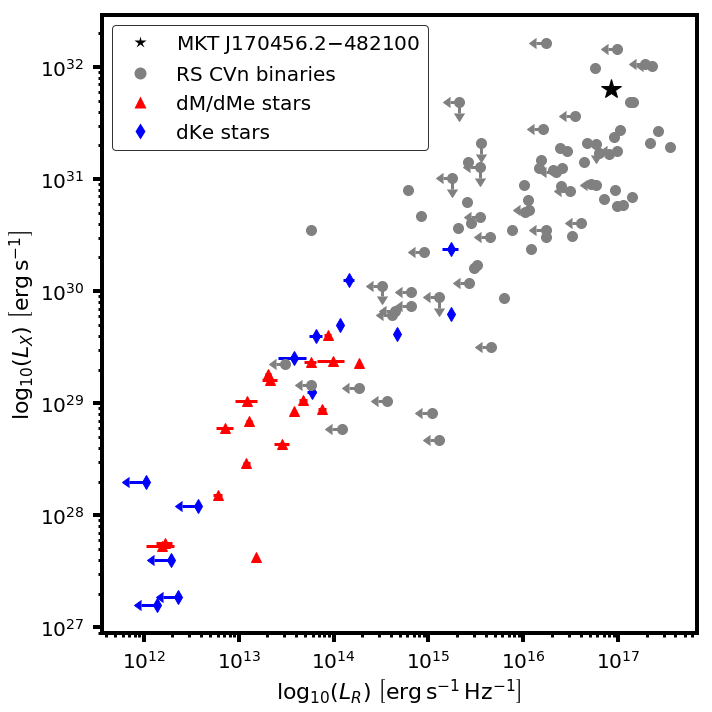

In [35]:
# Set up the point size and
# colours for the plots
pointsize = 10
grey_points = 'Grey'
framecol = 'Black'
blue_points = 'Blue'
red_points = 'Red'
star = 'Black'

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the different X-ray and Radio fluxes
ax.errorbar(weighted_mean_erg, (dMes_xray),
            xerr=weighted_mean_erg_err, c=red_points,
            fmt='^', label='dM/dMe stars')
ax.errorbar(radioerg_1992AA, (xrays_1992AA),
            xerr=radioerg_err_1992AA,
            xuplims=radioflux_ul_1992AA, c=blue_points,
            fmt='d', label='dKe stars')
ax.errorbar(radioerg_1989ApJS, xray_1989ApJS,
            xerr=radioerg_err_1989ApJS,
            yerr=xray_err_1989ApJS, fmt='o', c=grey_points,
            xuplims=radio_1989ApJS_ul,
            uplims=xray_1989ApJS_ul, label='RS CVn')
# Plot MKT J170456.2-482100
ax.errorbar(meerkat_erg, meerkat_xray,
            xerr=meerkat_erg_err,
            yerr=[[0.46],
                  [1.89]],
            fmt='*', markersize=20, c=star,
            label=r'MKT J170456.2$-$482100')
ax.set_xscale('log')
ax.set_yscale('log')

# Make the legend
dme_dot = mlines.Line2D([], [],
                        markerfacecolor=red_points,
                        marker='^',
                        markeredgecolor='None',
                        markersize=pointsize+2,
                        markeredgewidth=3,
                        label='dM/dMe stars',
                        color='None')
dke_dot = mlines.Line2D([], [],
                        markerfacecolor=blue_points,
                        marker='d',
                        markeredgecolor='None',
                        markersize=pointsize+2,
                        markeredgewidth=3,
                        label='dKe stars',
                        color='None')
rscvn_dot = mlines.Line2D([], [],
                          markerfacecolor=grey_points,
                          marker='o',
                          markeredgecolor='None',
                          markersize=pointsize+2,
                          markeredgewidth=3,
                          label='RS CVn binaries',
                          color='None')
mkt_dot = mlines.Line2D([], [],
                        markerfacecolor=star,
                        marker='*',
                        markeredgecolor='None',
                        markersize=pointsize+2,
                        markeredgewidth=3,
                        label=r'MKT J170456.2$-$482100',
                        color='None')
leg0 = ax.legend(handles=[mkt_dot,
                          rscvn_dot,
                          dme_dot,
                          dke_dot],
                 fontsize=20,
                 frameon=True,
                 loc='upper left',
                 ncol=1,
                 edgecolor='Black',
                 facecolor='White')
for text in leg0.get_texts():
    text.set_color(framecol)

ax.set_ylabel((r'$\mathrm{log}_{10}\left(L_X\right)\,\,'
               r'\left[ \mathrm{erg\,s^{-1}} \right]$'),
              fontsize=22,
              color=framecol)
ax.set_xlabel((r'$\mathrm{log}_{10}\left(L_R\right)\,\,'
               r'\left[ \mathrm{erg\,s^{-1}\,Hz^{-1}} \right]$'),
              fontsize=22,
              color=framecol)

ax.tick_params(which='both',
               color=framecol,
               labelcolor=framecol)
for spine in ax.spines.values():
    spine.set_edgecolor(framecol)

fig.tight_layout()

if save_figures:
    fig.savefig('GudelPlotRepoduction.eps',
                transparent=False)